<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_FakeProvider__Sampler_Primitives_mkbahk_20241010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Qiskit 설치: Windows, 클라우드 환경 ###
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-ibm-runtime==0.30.0
%pip install qiskit-transpiler-service==0.4.10
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 16.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=799a84714481081a4bfd32d7c49bc1f178acbb45478011be249726d2f3f567a7
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.8/366.8 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
%pip show qiskit qiskit-ibm-runtime qiskit-transpiler-service qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-qasm3-import, qiskit-transpiler-service
---
Name: qiskit-ibm-runtime
Version: 0.30.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 
---
Name: qiskit-transpiler-service


#FakeProvider는 지원할 수 있는 Qubit 숫자, V1, V2 지원등 많이 차이납니다. 사용 전 확인필요
[Qiskit Docs: FakeProvider](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake_provider)

In [2]:
from qiskit_ibm_runtime import SamplerV2 # Importing the QiskitRuntimeService class
from qiskit_ibm_runtime.fake_provider import FakeManilaV2, FakeBrisbane
#rom qiskit_aer import AerSimulator
# Get a fake backend from the fake provider

#backend = AerSimulator()
#backend.set_options(backend_name="qsam_simulator")
#backend.set_options(backend_name="state_vector")
#backend = FakeManilaV2(
backend = FakeBrisbane()

##Backend Name Options for AerSimulator

The backend_name option is primarily used to specify the simulation method you want to employ. Here are the commonly used options:
* statevector: Simulates the quantum circuit using a statevector representation. This method is suitable for ideal simulations and provides access to the full quantum state. This is likely what you were attempting in your original code.
* density_matrix: Simulates the quantum circuit using a density matrix representation. This method is more general and can handle noisy simulations.
* stabilizer: Simulates the quantum circuit using the stabilizer formalism. This method is efficient for Clifford circuits and can handle a larger number of qubits.
* matrix_product_state: Simulates the quantum circuit using a matrix product state representation. This method is suitable for circuits with low entanglement.
* extended_stabilizer: Simulates the quantum circuit using an extended stabilizer formalism. This method is efficient for circuits with limited non-Clifford operations.
* unitary: Calculates the unitary matrix representing the quantum circuit.
* superop: Calculates the superoperator representing the quantum circuit.




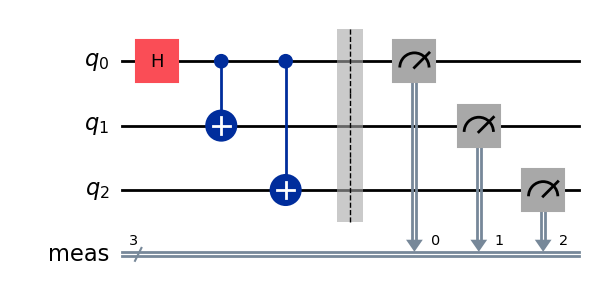

In [4]:
from qiskit import QuantumCircuit
# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw('mpl', style="iqp")

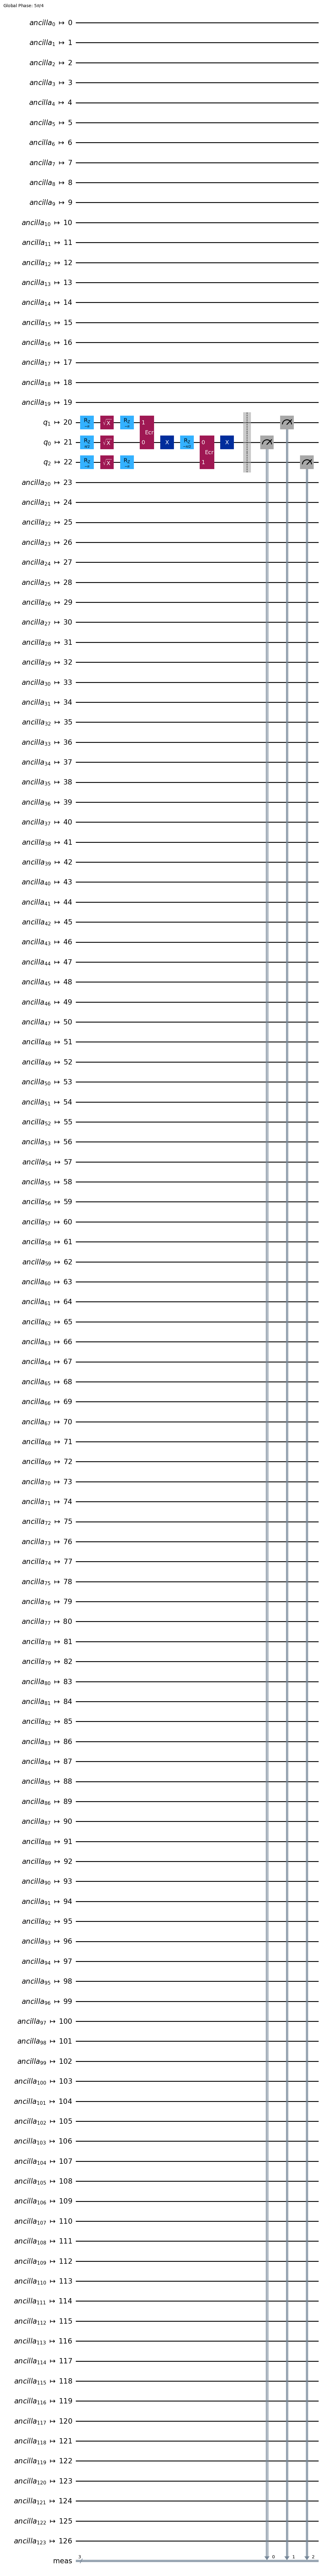

In [5]:
from qiskit import transpile
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl', style="iqp")

Qiskit-runtime-Service는 이전의 확률분포 반환에서 추가적으로 데이터를 반환하는 두 가지 방법을 제공합니다.
1.   측정하기로 선택한 큐비트 집합에 대한 확률 분포

```
# 회로 실행 및 결과 얻기
job = sampler.run(circuit)
result = job.result()
counts = result.quasi_dists[0]
# 결과 출력
print(counts)
```

2.   관측 가능한 값의 기대값

```
# 회로 실행 및 결과 얻기
job = estimator.run(observable, circuit)
result = job.result()
expectation_value = result.values[0]
# 결과 출력
print(expectation_value)
```
아래는 확률분포를 리턴하는 방법의 예입니다.


In [6]:
# Run the transpiled circuit using the simulated fake backend
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit])
pub_result = job.result()[0]
counts = pub_result.data.meas.get_counts()

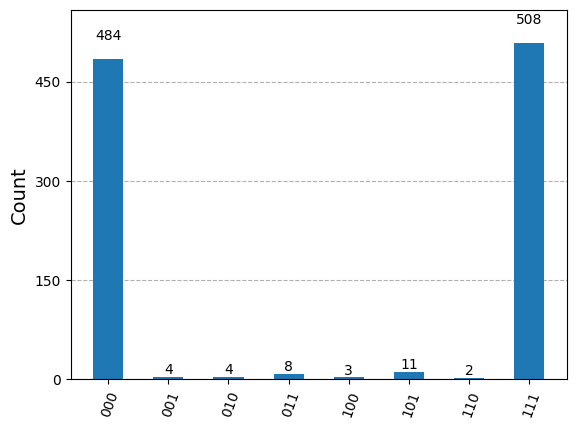

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)